In [19]:
"""Train a document classifier."""
import reuters
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import time
from sklearn.svm import LinearSVC
from scoring import get_tptnfpfn, get_accuracy, get_f_score

from sklearn.metrics import accuracy_score, fbeta_score, confusion_matrix


def main(dataset_module):
    """
    Train a classifier for a dataset.

    Parameters
    ----------
    categories : list of str
    document_ids : list of str
    """
    # Calculate feature vectors
    data = dataset_module.load_data()

    xs = {'train': data['x_train'], 'test': data['x_test']}
    ys = {'train': data['y_train'], 'test': data['y_test']}

    # Get classifiers
    classifiers = [
        ('LinearSVC', OneVsRestClassifier(LinearSVC(random_state=42))),
        ('Decision Tree', DecisionTreeClassifier(max_depth=5)),
        ('Random Forest (50 estimators)',
         RandomForestClassifier(n_estimators=50, n_jobs=10)),
        ('Random Forest (200 estimators)',
         RandomForestClassifier(n_estimators=200, n_jobs=10)),
        ('Logistic Regression (C=1)',
         OneVsRestClassifier(LogisticRegression(C=1))),
        # ('Logistic Regression (C=1000)',
        #  OneVsRestClassifier(LogisticRegression(C=10000))),
        # ('k nn 3', KNeighborsClassifier(3)),
        # ('k nn 5', KNeighborsClassifier(5)),
        # ('Naive Bayes', OneVsRestClassifier(GaussianNB())),
        # ('SVM, linear', OneVsRestClassifier(SVC(kernel="linear",
        #                                         C=0.025,
        #                                         cache_size=200))),
        # ('SVM, adj.', OneVsRestClassifier(SVC(probability=False,
        #                                       kernel="rbf",
        #                                       C=2.8,
        #                                       gamma=.0073,
        #                                       cache_size=200))),
        # ('AdaBoost', OneVsRestClassifier(AdaBoostClassifier())),  # 20 minutes to train
        # ('LDA', OneVsRestClassifier(LinearDiscriminantAnalysis())),  # took more than 6 hours
        # ('RBM 100', Pipeline(steps=[('rbm', BernoulliRBM(n_components=100)),
        #                             ('logistic', LogisticRegression(C=1))])),
        # ('RBM 100, n_iter=20',
        #  Pipeline(steps=[('rbm', BernoulliRBM(n_components=100, n_iter=20)),
        #                  ('logistic', LogisticRegression(C=1))])),
        # ('RBM 256', Pipeline(steps=[('rbm', BernoulliRBM(n_components=256)),
        #                             ('logistic', LogisticRegression(C=1))])),
        # ('RBM 512, n_iter=100',
        #  Pipeline(steps=[('rbm', BernoulliRBM(n_components=512, n_iter=10)),
        #                  ('logistic', LogisticRegression(C=1))])),
    ]

    print(("{clf_name:<30}: {score:<5}  in {train_time:>5} /  {test_time}")
          .format(clf_name="Classifier",
                  score="score",
                  train_time="train",
                  test_time="test"))
    print("-" * 70)
    
    predictions = []
    
    for clf_name, classifier in classifiers:
        t0 = time.time()
        classifier.fit(xs['train'], ys['train'])
        t1 = time.time()
        score = classifier.score(xs['test'], ys['test'])
        t2 = time.time()
        print(("{clf_name:<30}: {score:0.2f}% in {train_time:0.2f}s train / "
               "{test_time:0.2f}s test")
              .format(clf_name=clf_name,
                      score=(score * 100),
                      train_time=t1 - t0,
                      test_time=t2 - t1))
        # res = get_tptnfpfn(classifier, data)
        # print("\tAccuracy={}\tF1={}".format(get_accuracy(res), get_f_score(res)))
        predictions.append(classifier.predict(data['x_test']))
        
    return predictions, data['y_test']


raw_predictions, raw_labels = main(reuters)

Classifier                    : score  in train /  test
----------------------------------------------------------------------


LinearSVC                     : 81.05% in 30.42s train / 8.84s test


Decision Tree                 : 55.78% in 30.28s train / 0.27s test


Random Forest (50 estimators) : 64.52% in 27.61s train / 2.37s test


Random Forest (200 estimators): 65.68% in 108.87s train / 7.58s test


Logistic Regression (C=1)     : 67.47% in 37.18s train / 8.83s test


Accuracy: 0.861543557469
Fbeta_score: 0.853227106423


/home/rlutz/.virtualenvs/tensorflow/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rlutz/.virtualenvs/tensorflow/lib/python3.4/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/rlutz/.virtualenvs/tensorflow/lib/python3.4/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


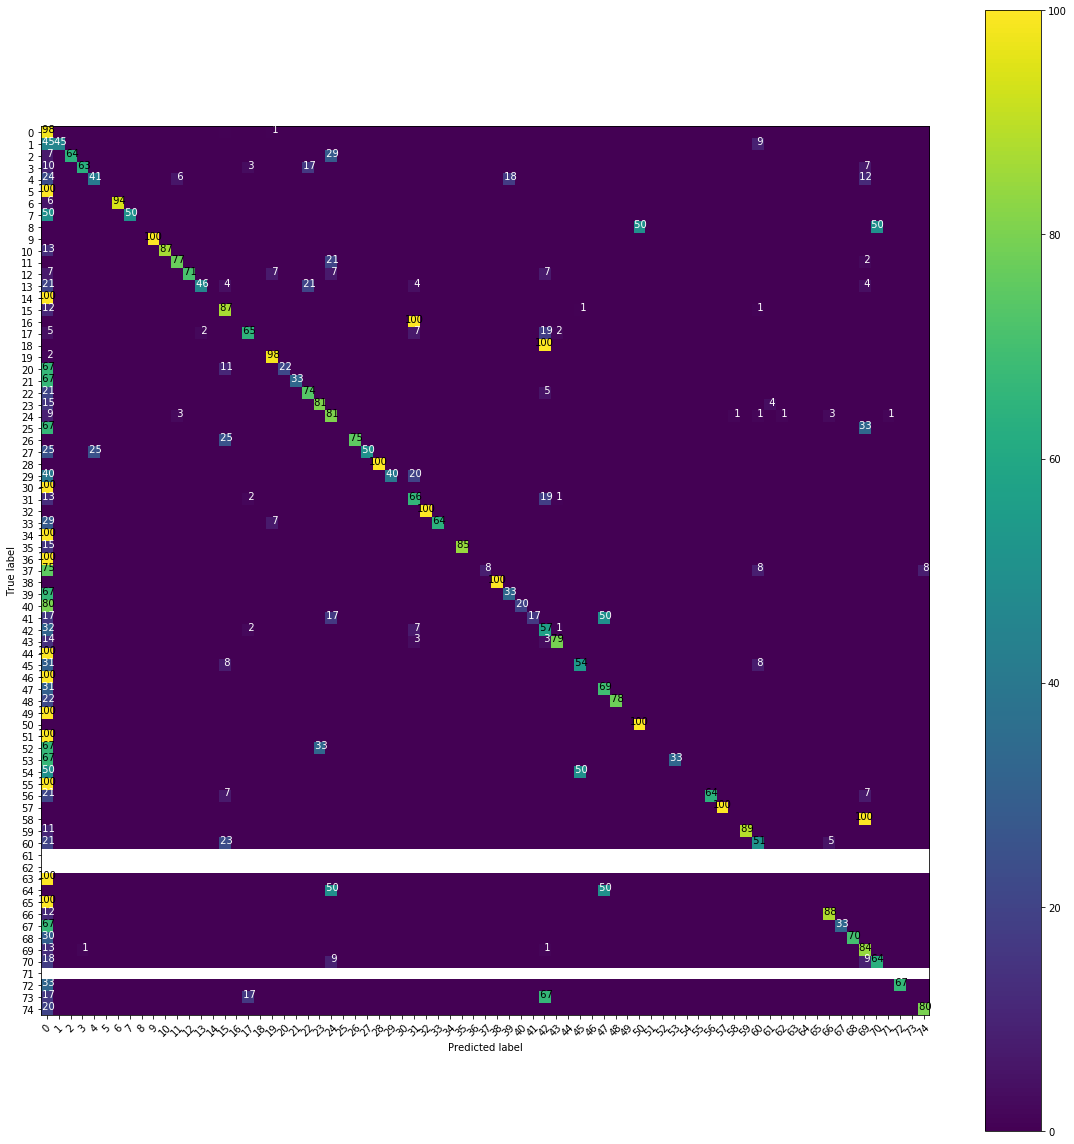

Accuracy: 0.635972176217
Fbeta_score: 0.552962333149


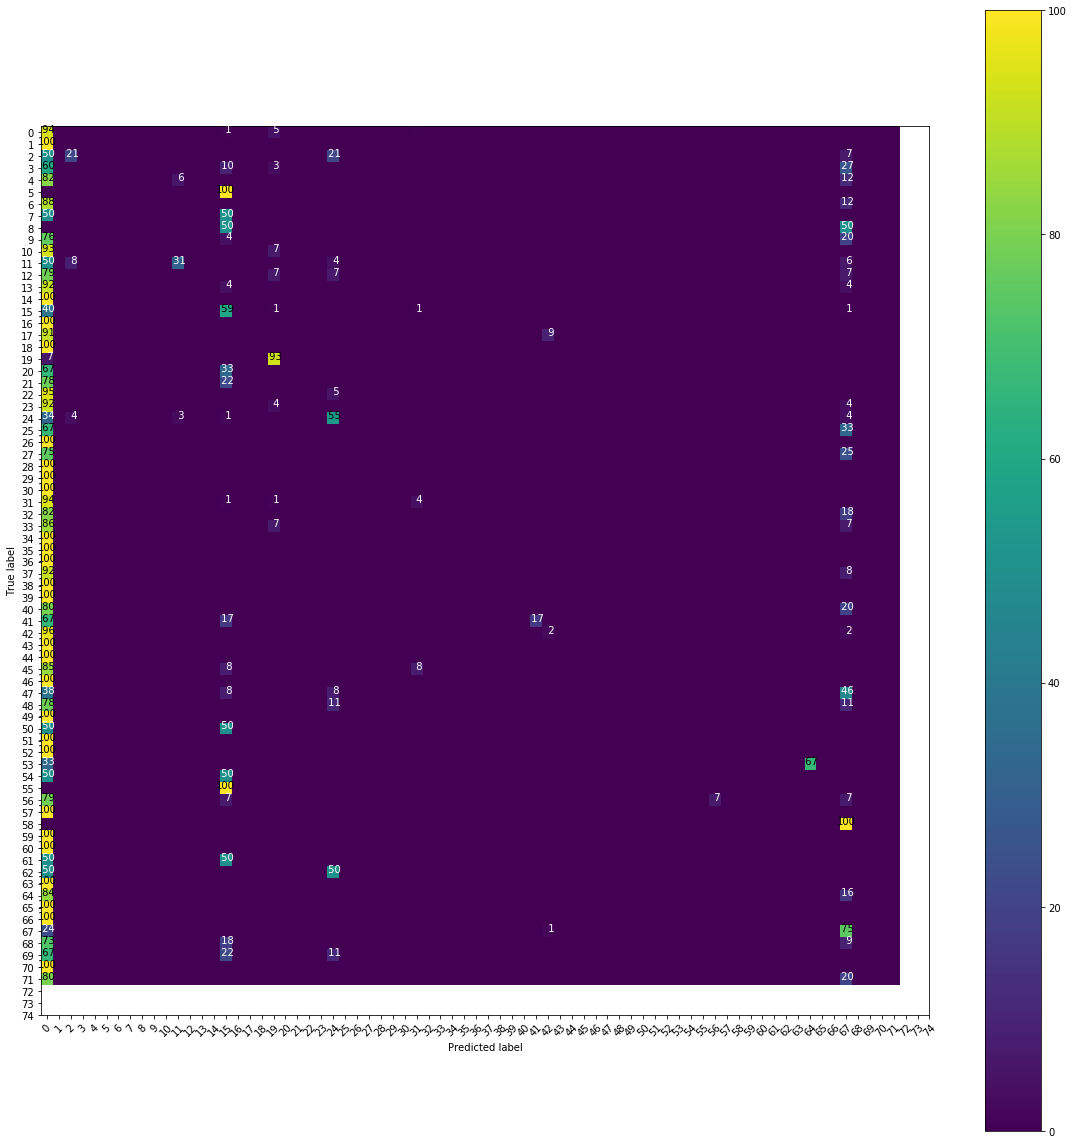

Accuracy: 0.680026498841
Fbeta_score: 0.650681113356


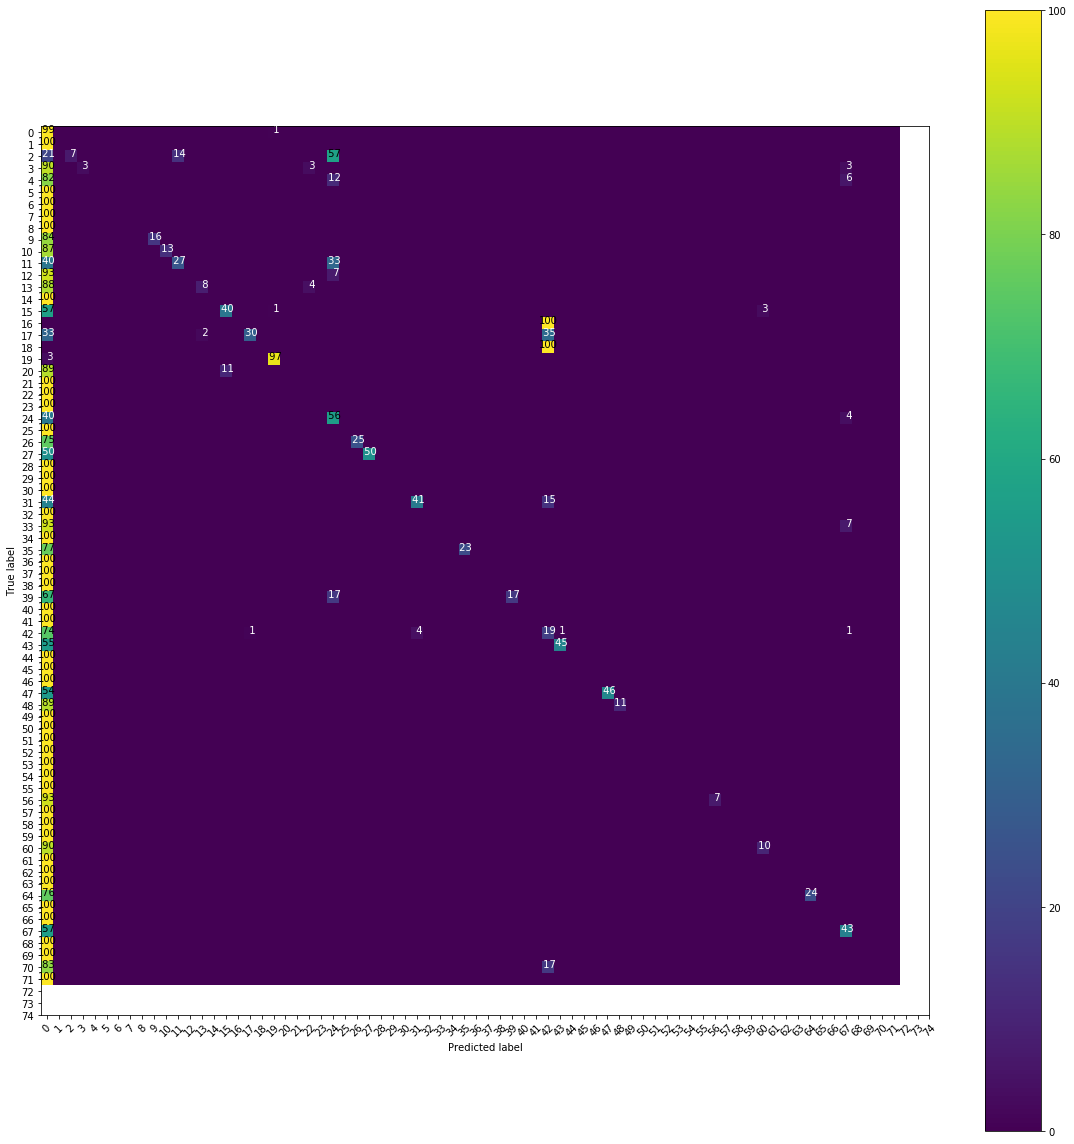

Accuracy: 0.687644915535
Fbeta_score: 0.658533163309


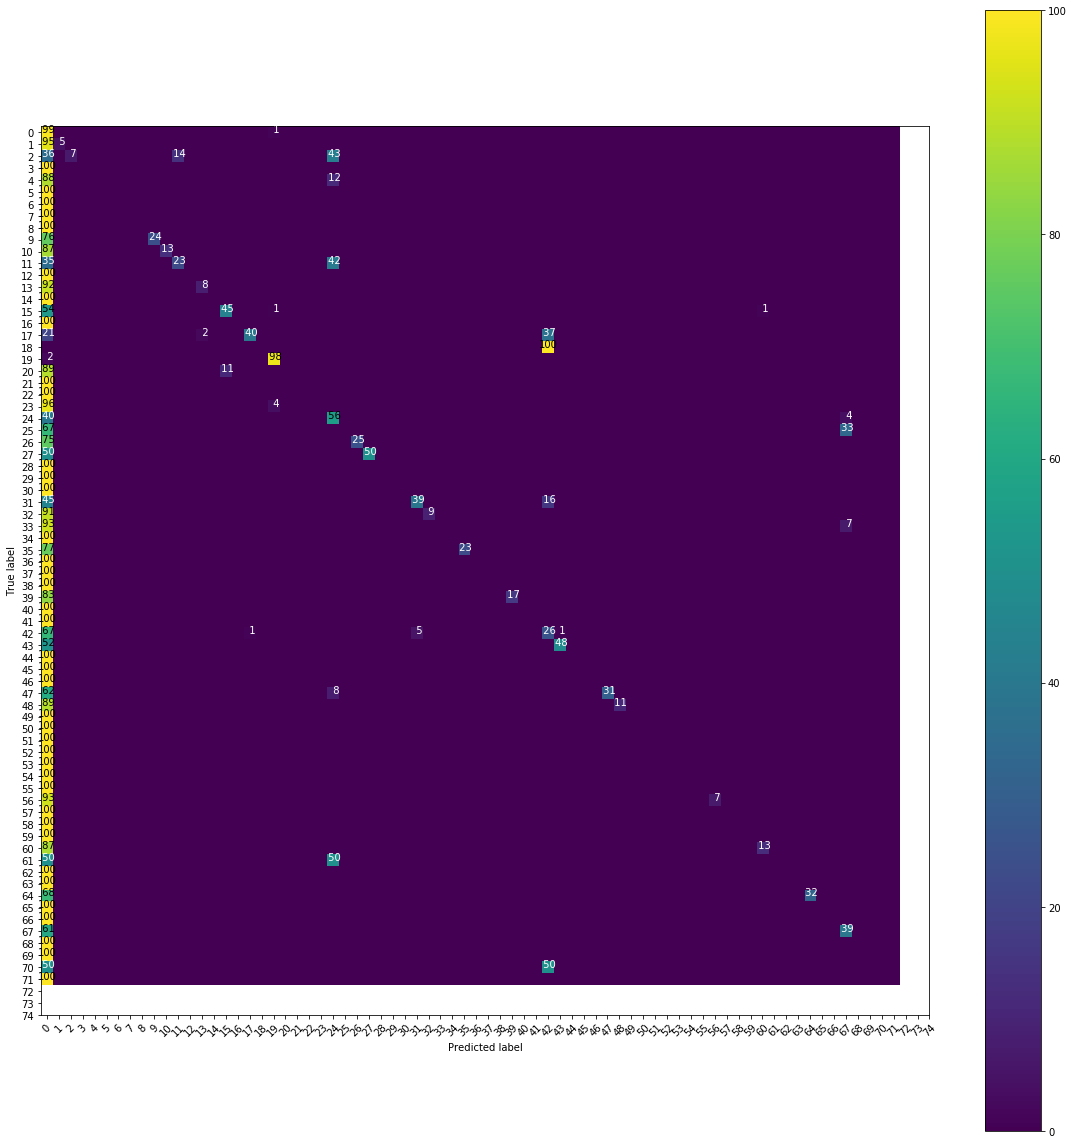

Accuracy: 0.715799933753
Fbeta_score: 0.68398918779


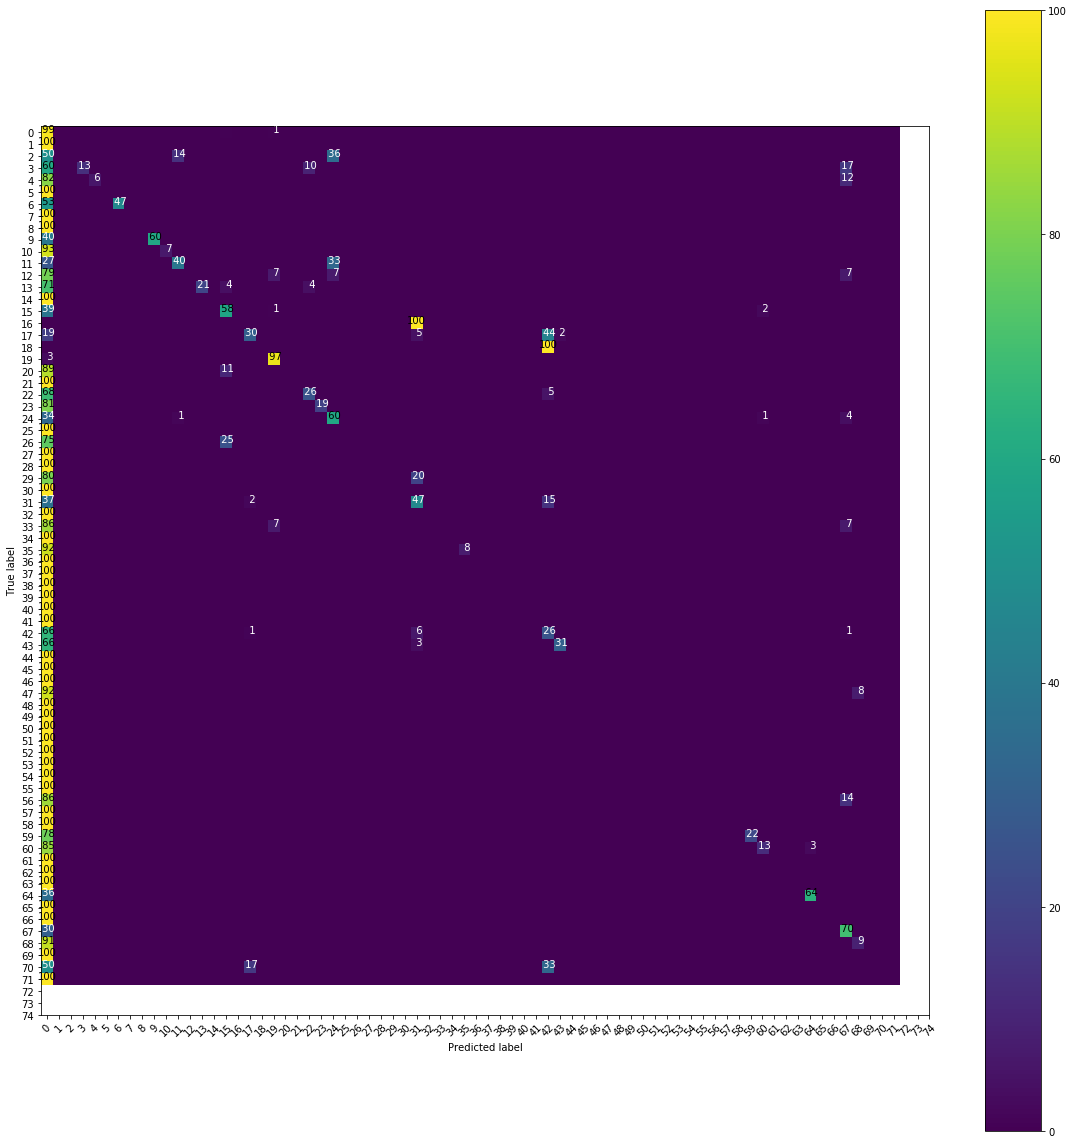

In [26]:
from sklearn.metrics import accuracy_score, fbeta_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np

num_classes = 75

labels = [np.argmax(v) for v in raw_labels]
    
for pred in raw_predictions:
    
    pred = [np.argmax(v) for v in pred]
    
    print("Accuracy:", accuracy_score(y_true=labels, y_pred=pred))
    print("Fbeta_score:", fbeta_score(y_true=labels, y_pred=pred, beta=0.5, average="weighted"))
    
    
    matrix = confusion_matrix(y_true=labels, y_pred=pred)
    
    np.set_printoptions(precision=2)
    
    plt.figure(figsize=(16, 16))
    
    classes = range(num_classes)
    
    # normalisation
    norm_matrix = matrix
    norm_matrix = 100 * norm_matrix.astype('float') / norm_matrix.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(norm_matrix, interpolation='nearest')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = 50
    for i, j in itertools.product(range(norm_matrix.shape[0]), range(norm_matrix.shape[1])):
        plt.text(j, i, "{:3.0f}".format(norm_matrix[i, j]) if norm_matrix[i, j] > 0.5 else "",
                 horizontalalignment="center",
                 color="black" if norm_matrix[i, j] > thresh else "white")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()